# Homework Assignment 2
In this homework assignment, you will explore Auto-MPG Dataset. 

Dataset contains following attributes:
1. mpg (miles per gallon)
2. cylinders (number of cylinders, power unit of an engine)
3. displacement (total volume of all the cylinders in an engine, measured in cubic centimeters [cc])
4. horsepower: (the amount of power an engine develops)
5. weight: (weight of the car)
6. acceleration: (accelaration of the car)
7. year: (model year of the car, two digits representing the year from 19**)
8. origin: (shows the origin of the car, 1 for American, 2 for European and 3 for Asian)
9. car name: (unique name for each car)

You will explore the data types and scales, cardinalities, number of missing values, detect outliers, handle missing values and outliers and create data quality report for original and cleaned dataset.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Read the dataset

In [3]:
adf = pd.read_csv('auto-mpg.csv')
adf.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,carname
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### Q1 (10 points)
Identify the data types (numerical [int, float], categorical) and data scales for all the attributes.

In [4]:
#Answer to Q1

desc = pd.DataFrame(columns=['Attribute','Data Type','Data Scale'])

desc['Attribute'] = adf.dtypes.index
desc['Data Type'] = adf.dtypes.values
    
desc.loc[desc['Data Type'] != object, 'Data Scale'] = 'Ratio'
desc.loc[desc['Attribute'] == 'carname', 'Data Scale'] = 'Nominal'
desc.loc[desc['Attribute'] == 'origin', 'Data Scale'] = 'Nominal'
desc.loc[desc['Attribute'] == 'year', 'Data Scale'] = 'Ordinal'


desc.style.hide_index()

Attribute,Data Type,Data Scale
mpg,float64,Ratio
cylinders,int64,Ratio
displacement,float64,Ratio
horsepower,float64,Ratio
weight,int64,Ratio
acceleration,float64,Ratio
year,int64,Ordinal
origin,int64,Nominal
carname,object,Nominal


| Attribute  | Data Type  | Data Scale |
|------------|------------|------------|
|     mpg    | ?          |      ?     |
|displacement| ?          |      ?     |
|horsepower  | ?          |      ?     |
|weight      | ?          |      ?     |
|year        | ?          |      ?     |
|origin      | ?          |      ?     |
|carname     | ?          |      ?     |




### Q2 (20 points)
Identify the cardinalities (number of unique values) and number of missing values for each attribute

In [4]:
# Your answer to Q2 goes here!
print(adf.nunique())
print(adf.isnull().sum())

mpg             129
cylinders         6
displacement     83
horsepower       93
weight          357
acceleration     96
year             13
origin            3
carname         312
dtype: int64
mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
carname         0
dtype: int64


### Q3 (20 points)
Visualize the distribution of each attribute (other than carname, since it is unique). Note here that for nominal and ordinal scale attributes, use bar plots. For ratio and interval scale attributes, use histograms.

Hint: To get the counts of numerical (but also nominal) attributes, you can use `value_counts()` method.


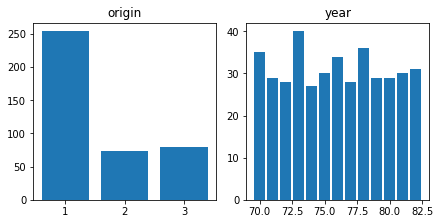

Int64Index([73, 78, 70, 76, 82, 81, 75, 80, 79, 71, 77, 72, 74], dtype='int64')


In [6]:
# For categorical attributes
fig, ax = plt.subplots(1,2,squeeze=False,constrained_layout=True,figsize=(6,3))
# fig.figsize=(10,3)
ax[0][0].bar(adf['origin'].value_counts().index,adf['origin'].value_counts().values)
ax[0][0].set_title('origin')

ax[0][1].bar(adf['year'].value_counts().index,adf['year'].value_counts().values)
ax[0][1].set_title('year')

plt.show()
print(adf['year'].value_counts().index)

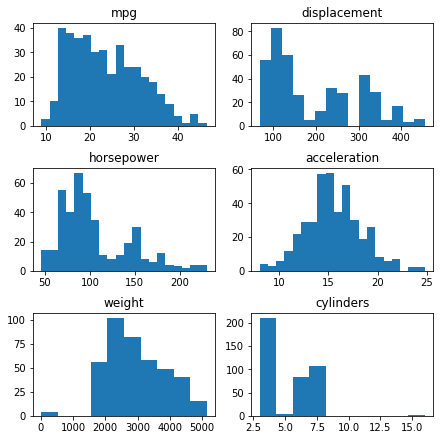

In [7]:
# For numerical attributes
fig, ax = plt.subplots(3,2,squeeze=False,constrained_layout=True,figsize=(6,6))
# fig.figsize=(10,3)
ax[0][0].hist(adf['mpg'], bins=20)
ax[0][0].set_title('mpg')

ax[0][1].hist(adf['displacement'], bins=15)
ax[0][1].set_title('displacement')

ax[1][0].hist(adf['horsepower'],bins=20)
ax[1][0].set_title('horsepower')

ax[1][1].hist(adf['acceleration'], bins=20)
ax[1][1].set_title('acceleration')

ax[2][0].hist(adf['weight'])
ax[2][0].set_title('weight')

ax[2][1].hist(adf['cylinders'])
ax[2][1].set_title('cylinders')

plt.show()


### Q4 (20 points)
Using your favorite outlier detection method, identify the outliers for each attribute (other than year, origin, and carname). For each outlier, remove the outlier or replace with a default value.

Hint 1: For simplicity, you can use $\mu \pm 2\sigma$ (alternatively, $3\sigma$) or the interval between $Q1-1.5IQR$ and $Q3+1.5IQR$.

Hint 2: To replace, you can use the median/mean value or minimum/maximum value depending on the direction of the outlier.


#### Reason for choice of outlier detection method

I chose Median +/- 3 S.D. as a method for outlier detection as the mean value is highly influenced by the presence of outliers in the dataset. The outliers are replaced with minimum or maximum value depending on the direction of the outlier

In [8]:
# Answer to Q4 goes here
# print(adf.describe())

print(adf.describe())
print("Skew before :--------")
print( adf.skew())
def outlier_detection (col):
    median = col.median()
    std = col.std()
    min_range = median - 3*std
    max_range = median + 3*std
    outlier = col[(col > max_range) | (col < min_range)]
    print("Outliers in ",col.name)
    print(outlier)
    col.loc[col > max_range] = (col[col < max_range]).max()
    col.loc[col < min_range] = (col[col > min_range]).min()
    return col

adf['mpg'] = outlier_detection(adf['mpg'].copy())
adf['displacement'] = outlier_detection(adf['displacement'].copy())
adf['horsepower'] = outlier_detection(adf['horsepower'].copy())
adf['acceleration'] = outlier_detection(adf['acceleration'].copy())
adf['weight'] = outlier_detection(adf['weight'].copy())
adf['cylinders'] = outlier_detection(adf['cylinders'].copy())


print("Skew after :--------")
print(adf.skew())
print(adf.describe())



              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  406.000000    406.000000  400.000000   406.000000   
mean    23.514573    5.500000    194.779557  105.082500  2952.305419   
std      7.815984    1.789889    104.922458   38.768779   891.587329   
min      9.000000    3.000000     68.000000   46.000000    19.000000   
25%     17.500000    4.000000    105.000000   75.750000  2220.000000   
50%     23.000000    4.000000    151.000000   95.000000  2811.000000   
75%     29.000000    8.000000    302.000000  130.000000  3612.000000   
max     46.600000   16.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    406.000000  406.000000  406.000000  
mean      15.519704   75.921182    1.568966  
std        2.803359    3.748737    0.797479  
min        8.000000   70.000000    1.000000  
25%       13.700000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

### Q5 (10 points)
Handle the missing values you found in Q2 using kNN imputation. Use `KNNImputer` from `sklearn.imputer` for this task. Set the number of neighbors to 3 and use the column subset of `['cylinders', 'displacement', 'weight']` for imputation.

In [9]:
# Answer to Q5 goes here
# your code ....
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
impute_copy = adf[['mpg', 'horsepower', 'cylinders', 'displacement', 'weight']].copy()
print((impute_copy.isnull()).sum())

adf_transformed = knn_imputer.fit_transform(impute_copy)

print(sum(np.isnan(adf_transformed)))

"""adf_transformed is the new dataframe that contains 
all the columns of adf and the transformed columns 
after handling missing values"""

adf_trans = pd.DataFrame(index=range(adf.shape[0]), columns=['mpg', 'horsepower', 'cylinders', 'displacement', 'weight'])
adf_trans = pd.DataFrame(adf_transformed, dtype=None, copy=False,index = adf_trans.index, columns=adf_trans.columns )
adf_trans[['acceleration','year','origin','carname']] = adf[['acceleration','year','origin','carname']] 
print((adf_trans.isnull()).sum())

mpg             8
horsepower      6
cylinders       0
displacement    0
weight          0
dtype: int64
[0 0 0 0 0]
mpg             0
horsepower      0
cylinders       0
displacement    0
weight          0
acceleration    0
year            0
origin          0
carname         0
dtype: int64


In [10]:
adf_trans.head()

,mpg,horsepower,cylinders,displacement,weight,acceleration,year,origin,carname
0,18.0,130.0,8.0,307.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,165.0,8.0,350.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,150.0,8.0,318.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,150.0,8.0,304.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,140.0,8.0,302.0,3449.0,10.5,70,1,ford torino


### Q6 (20 points)
Create a Scatter Plot Matrix (a pair plot) of attributes. Use `origin` map plot aspects to different colors. Based on the SPLOM, answer the following questions.

#### Q6.a -  What can you say about the relationship between cylinders and mpg values?
#### Q6.b -  What can you say about the cylinders of Asian cars (origin = 3)?
#### Q6.c -  Is there a correlation between weight and displacement?
#### Q6.d - What can you say about the relationship between weight and mpg values?

Hint: Use keyword argument `hue='origin'` and `markers` to see the differences of cars with different origins. If you do so, you will also need to set `diag_kind='hist'` for this dataset as the diagnol plots will fail otherwise.


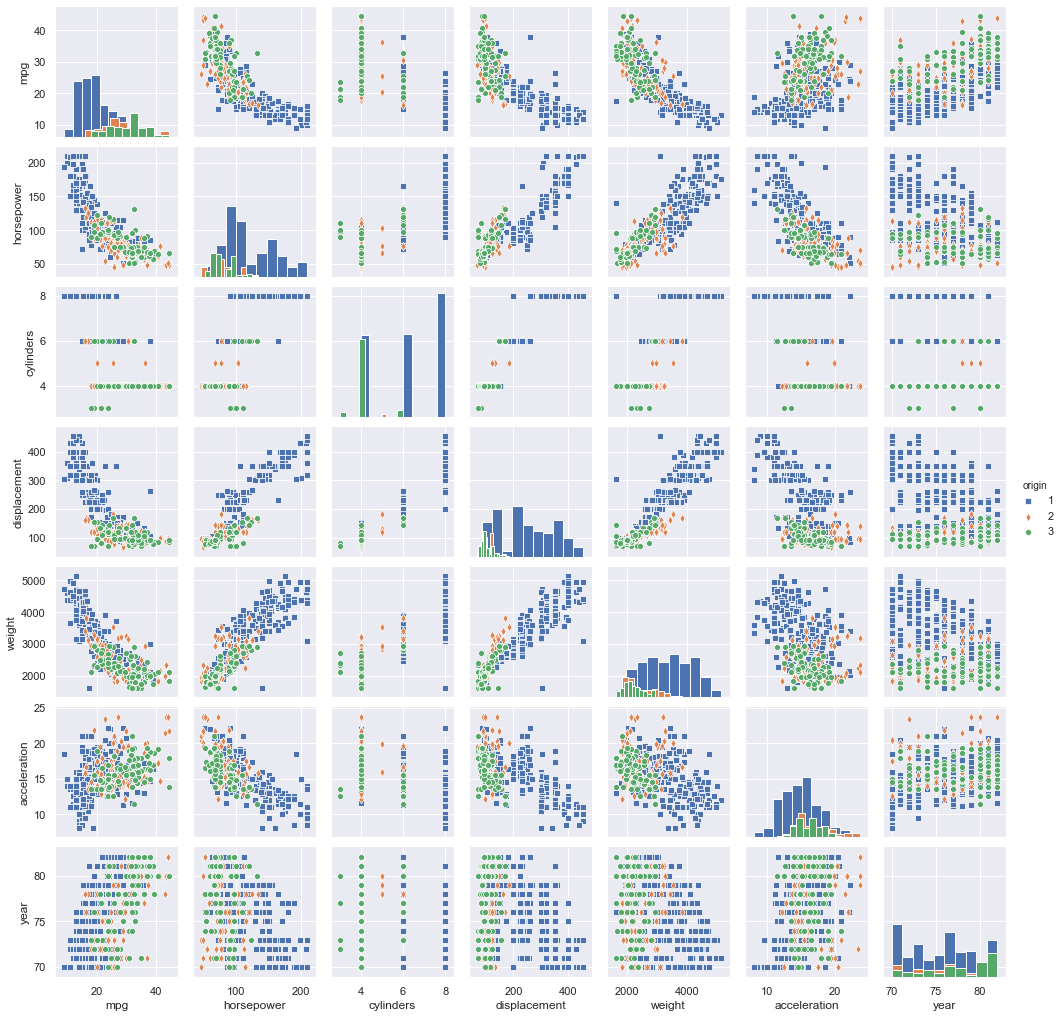

In [11]:
import seaborn as sns
# you answer to Q6 goes here...
sns.set()
sns.pairplot(adf_trans,hue ='origin',diag_kind='hist', markers = ['s','d','o'], height = 2.0)
plt.show()

### Q6.a - What can you say about the relationship between cylinders and mpg values?

Based on the above SPLOM, cylinders and mpg has a negative correlation with each other. Even though the subplot in 3rd row 1st column, suggests rather varied values of mpg for a constant number of cylinders. It could be reasoned that the varied value of mpg for a given cylinder could be dependent on some other features. However, the overall trend does reflect a decrease in the number of cylinders as mpg increases. The same is observed in the subplot at 1st row and 3rd column, where there is an overall decrease in mpg value with an increase in the number of cylinders.

### Q6.b - What can you say about the cylinders of Asian cars (origin = 3)?

Asian cars have lesser number of cylinders compared to European (Origin = 2) or American (Origin = 1)  cars. Asian cars most often came with 4 cylinders and rarely with 6 and 3 cylinders.This trend has been consistent over the years where post year 1975, asian cars occasionally have come up with 6 cylinders as well.




### Q6.c - Is there a correlation between weight and displacement?
Yes, there exists a positive correlation between weight and displacement. The subplot in 4th row and 5th column shows a positive linear relationship between displacement and weight, i.e., an increase in weight will result in an increase in the displacement. The same is true when observed in the subplot of 5th row and 4th column, where the increase in displacement results in an increase in the weight.


### Q6.d - What can you say about the relationship between weight and mpg values?

Based on the plotted SPLOM, it can be observed that there is a negative linear relationship between weight and mpg values. The subplot in 5th row and 1st column shows a negative trend in the data such that an increase in mpg value will result in a decrease in the weight. The same is true when observed in the subplot of 1st row and 5th column, where the increase in weight  results in a decrease in the value of mpg.


### Bonus Question (20 points)

Create a data quality report for the Auto-MPG dataset. 

Provide the data quality tables, distributions of categorical and nominal variables.

Also provide your solutions for handling outliers and missing values. 

Create the data quality tables after handling outliers and missing values.

Provide this as a separate PDF file. You can use the cells below to find statistics and create visualizations.


#### NOTE:  The solutions for this question are provided in a separate document. Please refer HW2_bonus for the same.